# Business Case: Aerofit

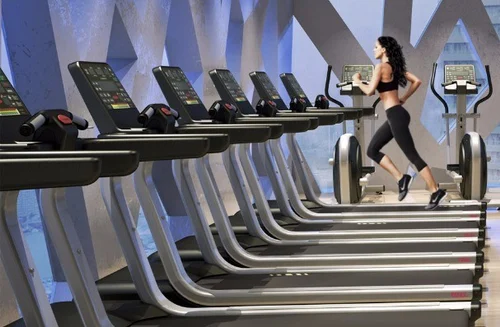

**Business Problem**

Aerofit is a leading brand in the field of fitness equipment. Aerofit provides a product range including machines such as treadmills, exercise bikes, gym equipment, and fitness accessories to cater to the needs of all categories of people.

The market research team at AeroFit wants to identify the characteristics of the target audience for each type of treadmill offered by the company, to provide a better recommendation of the treadmills to the new customers. The team decides to investigate whether there are differences across the product with respect to customer characteristics.

Perform descriptive analytics to create a customer profile for each AeroFit treadmill product by developing appropriate tables and charts.
For each AeroFit treadmill product, construct two-way contingency tables and compute all conditional and marginal probabilities along with their insights/impact on the business.


Link to the dataset - https://drive.google.com/file/d/13GsV-zhq09mN_TsQcAUKOj41IF7bNUIr/view?usp=sharing

### Problem Statement:

Leveraging the customer data collected by Aerofit consisting of the Gender, Age, Income, Weekly Usage, Fitness, Marital Status and Miles run on treadmill to identify characteristics which make the customer buy a particular treadmill out of KP281, KP481 and KP781 in the increasing order of expenditures. Further providing recommendations of treadmill for future orders/customers based on their profile.

## Creating the dataframe

In [1]:
# Importing libraries -
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
# Loading the dataset -
!gdown 13GsV-zhq09mN_TsQcAUKOj41IF7bNUIr


Downloading...
From: https://drive.google.com/uc?id=13GsV-zhq09mN_TsQcAUKOj41IF7bNUIr
To: C:\Users\HP\Desktop\scaler\5 DAV2\xx\aerofit.csv

  0%|          | 0.00/7.28k [00:00<?, ?B/s]
100%|##########| 7.28k/7.28k [00:00<?, ?B/s]


In [2]:
df = pd.read_csv("aerofit.csv")
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


## Basic description of the dataset
- Analysis of basic metrics
- Observations on shape of data
- Conversion to categorical data type
- Statistical summary

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [4]:
# Shape of the dataset -
df.shape #180 rows and 9 columns
print(f"Number of rows: {df.shape[0]:,} \nNumber of columns: {df.shape[1]}")

Number of rows: 180 
Number of columns: 9


In [5]:
# Checking the datatype -
df.dtypes

Product          object
Age               int64
Gender           object
Education         int64
MaritalStatus    object
Usage             int64
Fitness           int64
Income            int64
Miles             int64
dtype: object

In [6]:
# Number of unique values in each column
for i in df.columns:
    print(i,':',df[i].nunique())

Product : 3
Age : 32
Gender : 2
Education : 8
MaritalStatus : 2
Usage : 6
Fitness : 5
Income : 62
Miles : 37


* From above observation, we can conclude that only `Age`,`Income`,`Miles` can be considered as `Countinous`, the rest of the columns though integers/float should be considered as `catgeories`.
<!-- From the above observation, we can conclude that only Income, Miles and Age can be considered as Continuous, the rest of the columns though integers/floats should be considered as categories. -->

In [7]:
#Changing the data type of columns with 'object' data type to 'category', since it can do memory optimization
df=df.astype({"Product":"category","Gender":"category","MaritalStatus":"category"})

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Product        180 non-null    category
 1   Age            180 non-null    int64   
 2   Gender         180 non-null    category
 3   Education      180 non-null    int64   
 4   MaritalStatus  180 non-null    category
 5   Usage          180 non-null    int64   
 6   Fitness        180 non-null    int64   
 7   Income         180 non-null    int64   
 8   Miles          180 non-null    int64   
dtypes: category(3), int64(6)
memory usage: 9.5 KB


In [9]:
# Checking for null values
df.isnull().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

* There aren't missing values in the data set

In [10]:
df.describe(include='all')   #describing the numerical variables

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
count,180,180.000000,180,180.000000,180,180.000000,180.000000,180.000000,180.000000
unique,3,NaN,2,NaN,2,NaN,NaN,NaN,NaN
top,KP281,NaN,Male,NaN,Partnered,NaN,NaN,NaN,NaN
freq,80,NaN,104,NaN,107,NaN,NaN,NaN,NaN
mean,NaN,28.788889,NaN,15.572222,NaN,3.455556,3.311111,53719.577778,103.194444
std,NaN,6.943498,NaN,1.617055,NaN,1.084797,0.958869,16506.684226,51.863605
min,NaN,18.000000,NaN,12.000000,NaN,2.000000,1.000000,29562.000000,21.000000
25%,NaN,24.000000,NaN,14.000000,NaN,3.000000,3.000000,44058.750000,66.000000
50%,NaN,26.000000,NaN,16.000000,NaN,3.000000,3.000000,50596.500000,94.000000
75%,NaN,33.000000,NaN,16.000000,NaN,4.000000,4.000000,58668.000000,114.750000


### Insights

- The dataset contains 180 rows of data
- For each product type, there are 8 parameters of customers associated with them, resulting in 9 columns total.
- The parameters 'Product', 'Gender' and 'MaritalStatus' have categorical data.
- The parameters 'Age', 'Education', 'Usage', 'Fitness', 'Income', and 'Miles' have numerical data.
- There are no null values in the dataset.
- 3 types of products in the dataset:    KP281 (80 rows), KP481 (60 rows), or KP781 (40 rows).
- The range of age of customers is 18 to 50 years. The mean age is 28.79 and standard deviation of 6.94.
- Gender is either Male or Female, with more Male customers than Female.
- Marital Status of customers is either Single or partnered, with more customers Partnered than Single.
- Usage: The range of usage per week (average number of times the customer plans to use the treadmill) is from 2 to 7.
- Fitness (Self-rated fitness on a 1-to-5 scale, where 1 is the poor shape and 5 is the excellent shape) Fitness rating ranges from 1 to 5, with average being 3.3.
- The average number of miles the customer expects to walk/run each week ranges from 21 to 360.`

## Checking value counts for categorical columns -
<!-- Checking value counts for categorical columns - -->

In [11]:
df['Product'].value_counts()

KP281    80
KP481    60
KP781    40
Name: Product, dtype: int64

In [12]:
df['Gender'].value_counts()             

Male      104
Female     76
Name: Gender, dtype: int64

In [13]:
df['MaritalStatus'].value_counts()

Partnered    107
Single        73
Name: MaritalStatus, dtype: int64

In [14]:
# A broader look at the correaltion between the columns of dataframe
# creating a copy of dataframe
df_copy = df.copy()
df_copy['Gender'].replace(['Male','Female'],[0,1],inplace=True)
df_copy['Product'].replace(['KP281','KP481', 'KP781'],[0,1,2],inplace=True)
df_copy['MaritalStatus'].replace(['Partnered','Single'],[0,1],inplace=True)
# df_copy.corr()

## Observing the Outliers of All Countinous Column 



<Axes: xlabel='Miles'>

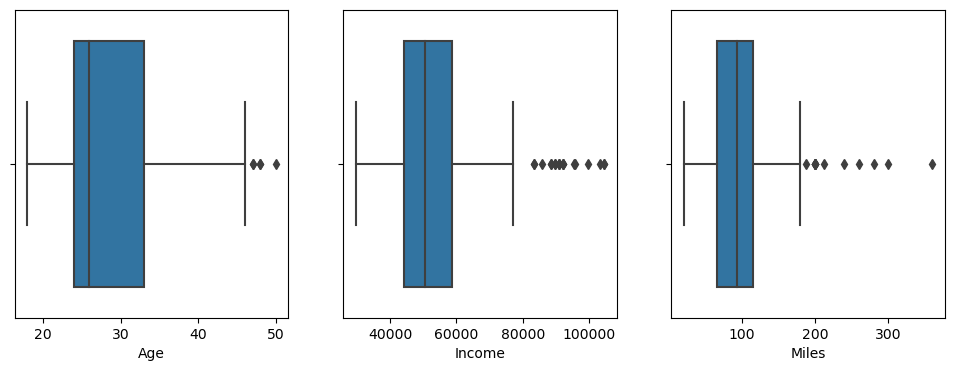

In [15]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
sns.boxplot(x=df['Age'])
plt.subplot(1, 3, 2)
sns.boxplot(x=df['Income'])
plt.subplot(1, 3, 3)
sns.boxplot(x=df['Miles'])


* Certainly there are outliers in our data. When we remove them, this leads to loss of information and moreover we have a very small dataset of 180 rows. So instead of removing, it's going to be clipped (i.e. - ranges between 5 percentile and 95 percentile).

* P.S. - The outlier treatment is demonstrated in the below piece of code for the copy of dataframe but it is not incorporated in the below analysis since these three numerical columns are binned and then analyzed.

Q1: 24.0
Median: 26.0
Mean: 28.788888888888888
Q3: 33.0
Inter Quartile Range: 9.0
Lower Outlier Bound: 10.5
Upper Outlier Bound: 46.5

Percentage of outliers: 5


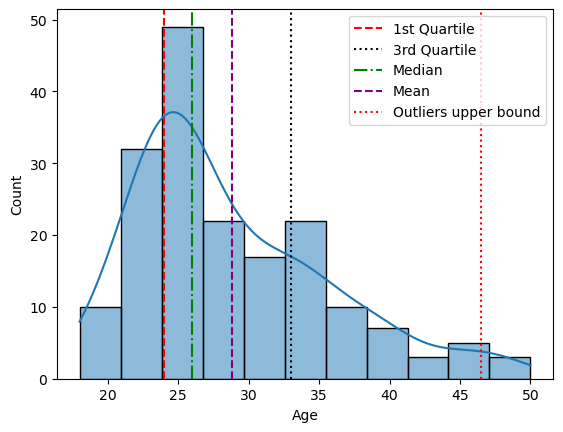

In [16]:
data = df['Age']
# 1st and 3rd Quartiles
Q1 = data.quantile(0.25)
Q2=data.quantile(0.5)
mean=data.mean()
Q3 = data.quantile(0.75)
# Interquartile Range (IQR)
IQR = Q3 - Q1
# Lower and Upper Outlier Bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print(f"Q1: {Q1}")
print(f"Median: {Q2}")
print(f"Mean: {mean}")
print(f"Q3: {Q3}")
print(f"Inter Quartile Range: {IQR}")
print(f"Lower Outlier Bound: {lower_bound}")
print(f"Upper Outlier Bound: {upper_bound}", end="\n\n")
print(f"Percentage of outliers: { round (len(df.loc[ (df['Age']>upper_bound) | (df['Age']< lower_bound)]))}")

sns.histplot(data=df,x='Age',kde=True)
plt.axvline(Q1,color='red',linestyle='--',label="1st Quartile")
plt.axvline(Q3,color='black',linestyle=':',label="3rd Quartile")
plt.axvline(Q2,color='green',linestyle='-.',label="Median")
plt.axvline(mean,color='purple',linestyle="--",label="Mean")
plt.axvline(upper_bound,color='red',linestyle=":",label="Outliers upper bound")
plt.legend()
plt.show()


In [17]:
# Outiler treatment 
num_feat=['Age', 'Income', 'Miles']
for col in num_feat:
    percentiles = df[col].quantile([0.05,0.95]).values
    df_copy[col] = np.clip(df_copy[col], percentiles[0], percentiles[1])

## Scatterplots for Analysis of Continuous Variables -

<Axes: xlabel='Income', ylabel='Miles'>

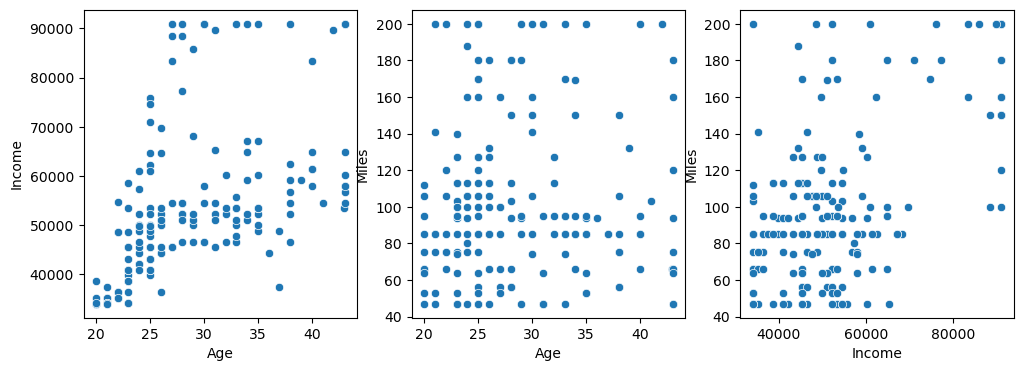

In [18]:
plt.figure(figsize=(12, 4))
# Observing the association between Age and Income 
plt.subplot(1, 3, 1)
sns.scatterplot(x=df_copy['Age'],y=df_copy['Income'])

# Observing the association between Age and Miles 
plt.subplot(1, 3, 2)
sns.scatterplot(x=df_copy['Age'],y=df_copy['Miles'])

# Observing the association between Miles and Income -
plt.subplot(1, 3, 3)
sns.scatterplot(x=df_copy['Income'],y=df_copy['Miles'])

* The variance of income in lower ages is smaller as compared to the variance in higher ages, probably something called as **Heteroscadasticity**.
* No significant pattern or observation between Age and Miles run on a treadmill, also implied by heatmap with a correlation of 0.037.
* The miles run on treadmill increase significantly with income, infact only people having incomes above 70000 have run over 220 miles. Moreover there's also a **Heteroscadastic** effect.

<Axes: >

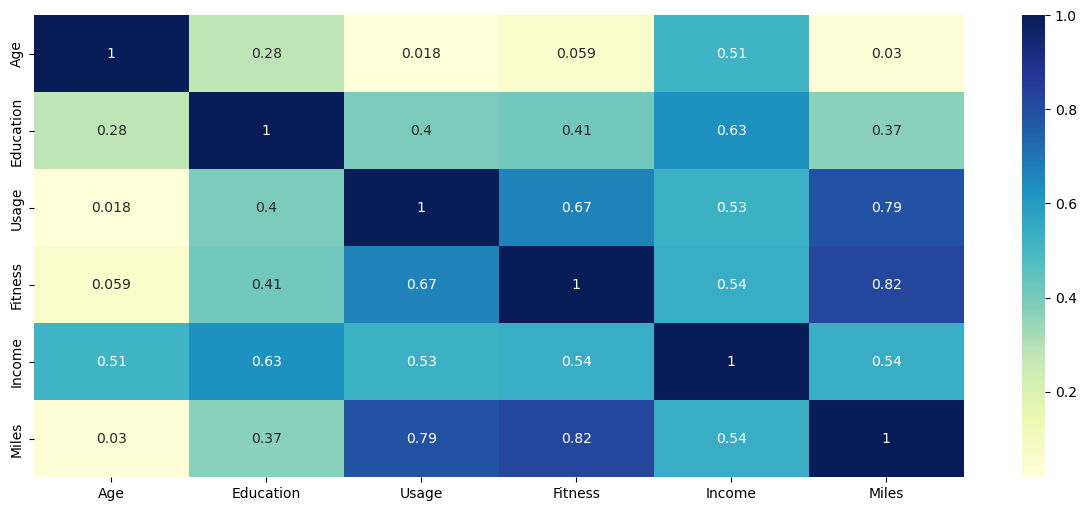

In [19]:
# correaltion plot for above heatmap
plt.figure(figsize=(15,6))
sns.heatmap(df_copy.corr(),annot=True,cmap='YlGnBu')

**Noteworthy points**
1) The product/treadmill purchased highly correlates with Education, Income, Usage, Fitness and Miles. This suggests that individuals with higher levels of education tend to prefer certain products over others.
2) Age is highly correlated to income which definitely seems reasonble. 
3) There is a weak negative correlation between Gender and Education. This suggests that there might be some gender-related differences in educational attainment, with one gender having slightly higher education on average.
4) Education is highly correalted to Product, Income and Fitness. Here we can say that Educated people with more income tends to buy Product and we can see that they maintained thier fitness is also good.
5) There is a weak negative correlation between Marital Status with Age, Gender, Income. This implies that marital status may have a slight impact on income.
6) There is a strong positive correlation between Usage with Miles, Fitness. This indicates that individuals who use the product more also tend to run more miles. This correlation may be valuable for marketing or product development.
7) There is a moderate positive correlation between Fitness and Income. This suggests that people with higher incomes tend to have better fitness levels.

**More Observations and Possibilities:-**

1) Product, Fitness, Usage and Miles depict a ridiculously higher correlation among themselves which looks as expected since more the usage implying more miles run and certainly more fitness.

2) Also a story which seems reasonable is that Age and Education (predominately) are indicators of Income which affects the products bought. The more advanced the product is, the more its usage and hence more the miles run which in turns improves the fitness. 

Note:- Above point 2 is just something which may or mayn't be true as **Correlation doesn't imply Causation**.

<Axes: xlabel='Miles', ylabel='Density'>

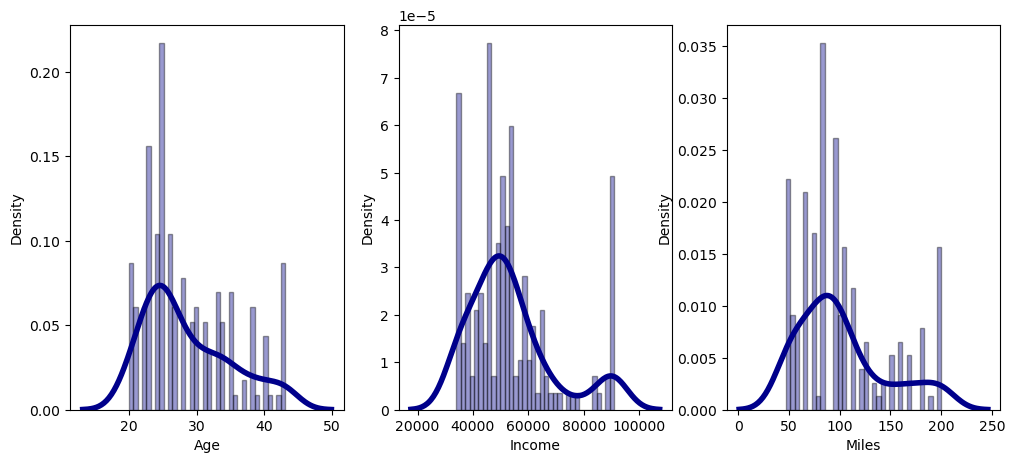

In [20]:
plt.figure(figsize=(12, 5))

# Observing the ages to create bins
plt.subplot(1, 3, 1)
sns.distplot(df_copy['Age'], hist=True, kde=True, bins=36, color = 'darkblue', 
             hist_kws={'edgecolor':'black'}, kde_kws={'linewidth': 4})

# Observing the ages to create Income
plt.subplot(1, 3, 2)
sns.distplot(df_copy['Income'], hist=True, kde=True, bins=36, color = 'darkblue', 
             hist_kws={'edgecolor':'black'}, kde_kws={'linewidth': 4})

# Observing the ages to create Miles
plt.subplot(1, 3, 3)
sns.distplot(df_copy['Miles'], hist=True, kde=True, bins=36, color = 'darkblue', 
             hist_kws={'edgecolor':'black'}, kde_kws={'linewidth': 4})


In [21]:
# Creating a bins for Age, Income and miles

# Creating bins on intervals of 5 as age gaps and below 20, above 40 -
bins = [-1,20,25,30,35,40,55]
labels = ['<20','20-25','25-30','30-35','35-40','40+']
df['Age_bins'] = pd.cut(df['Age'],bins=bins,labels=labels) 

# Creating bins for income 
bins = [-1,35000,45000,50000,60000,70000,90000,120000]
labels = ['<35000','35000-45000','45000-50000','50000-60000','60000-70000','70000-90000','90000+']
df['Income_bins'] = pd.cut(df['Income'], bins=bins, labels=labels)

# Creating bins for miles 
bins = [-1,50,100,150,400]
labels = ['<50','50-100','100-150','150+']
df['Mile_bins'] = pd.cut(df['Miles'], bins=bins, labels=labels)

df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Age_bins,Income_bins,Mile_bins
0,KP281,18,Male,14,Single,3,4,29562,112,<20,<35000,100-150
1,KP281,19,Male,15,Single,2,3,31836,75,<20,<35000,50-100
2,KP281,19,Female,14,Partnered,4,3,30699,66,<20,<35000,50-100
3,KP281,19,Male,12,Single,3,3,32973,85,<20,<35000,50-100
4,KP281,20,Male,13,Partnered,4,2,35247,47,<20,35000-45000,<50


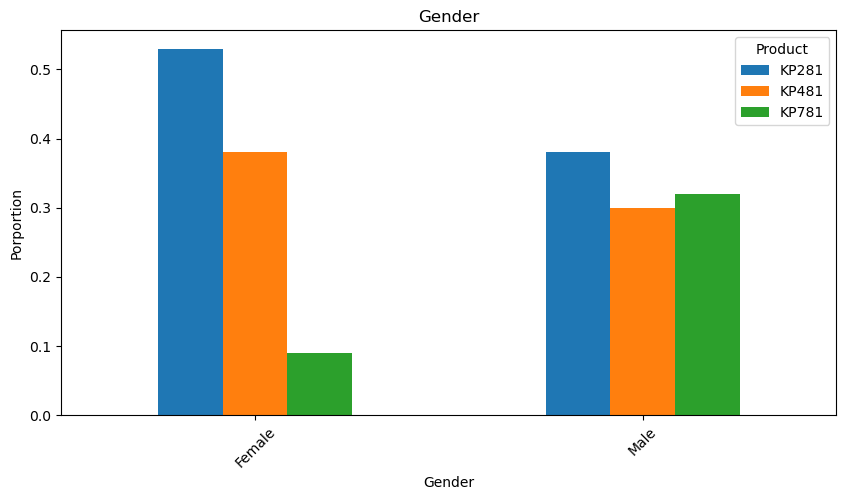

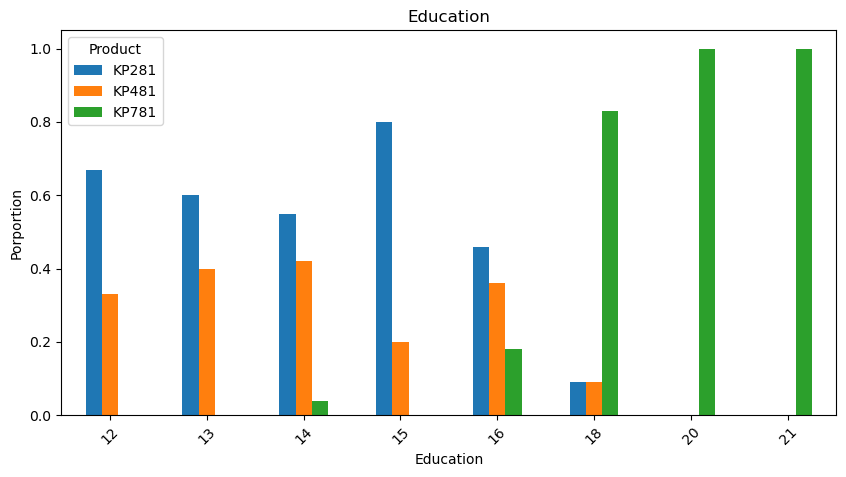

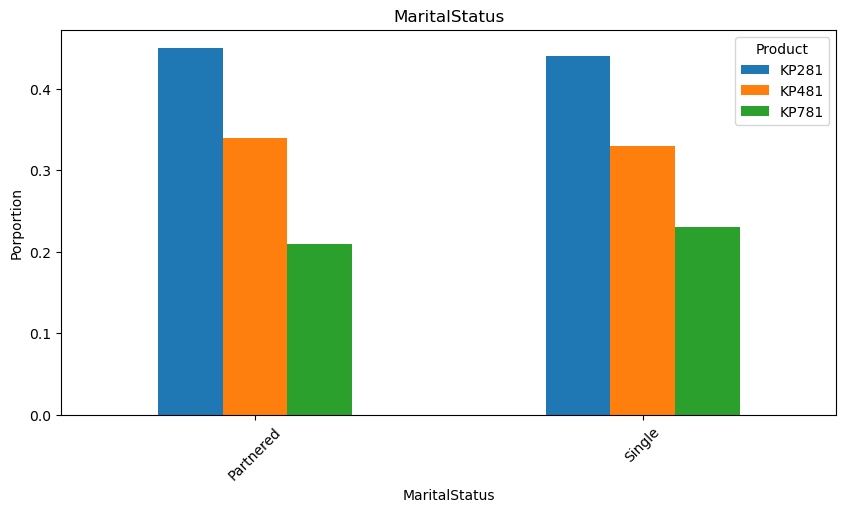

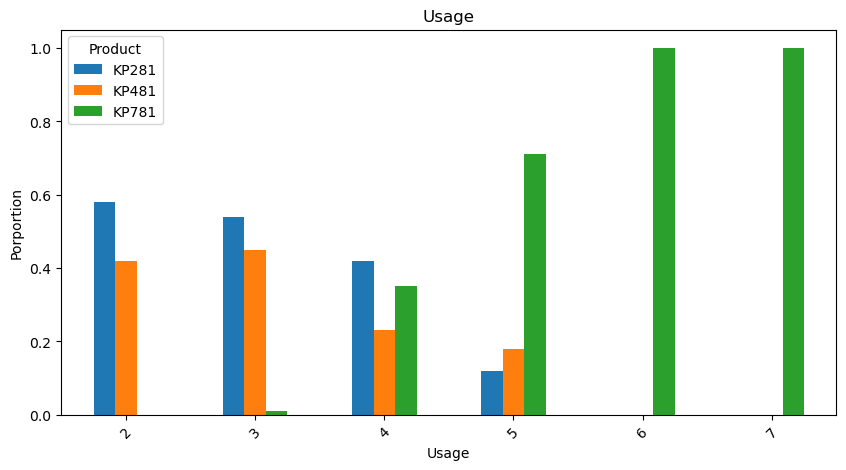

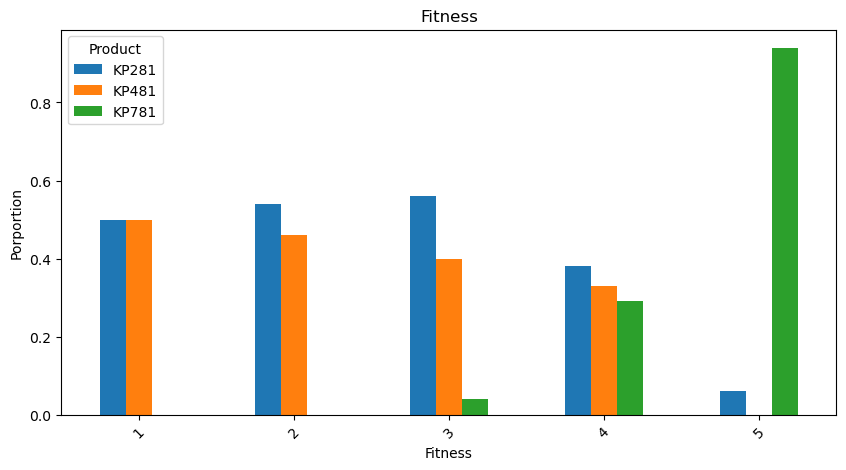

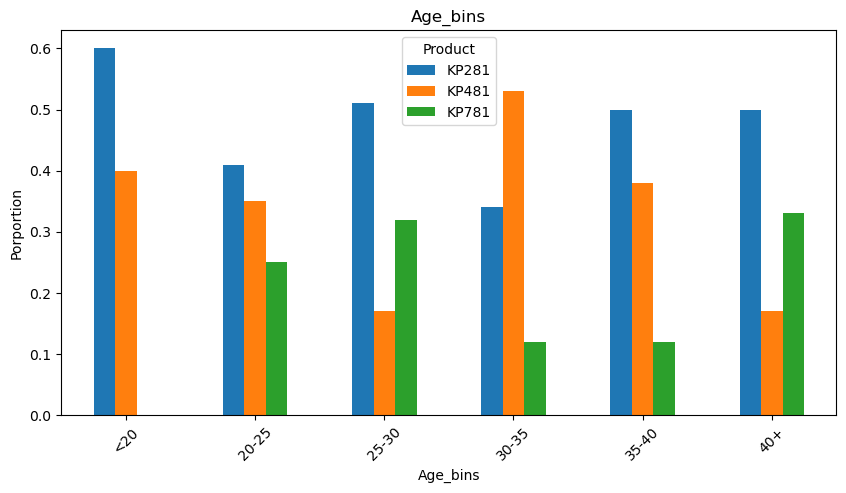

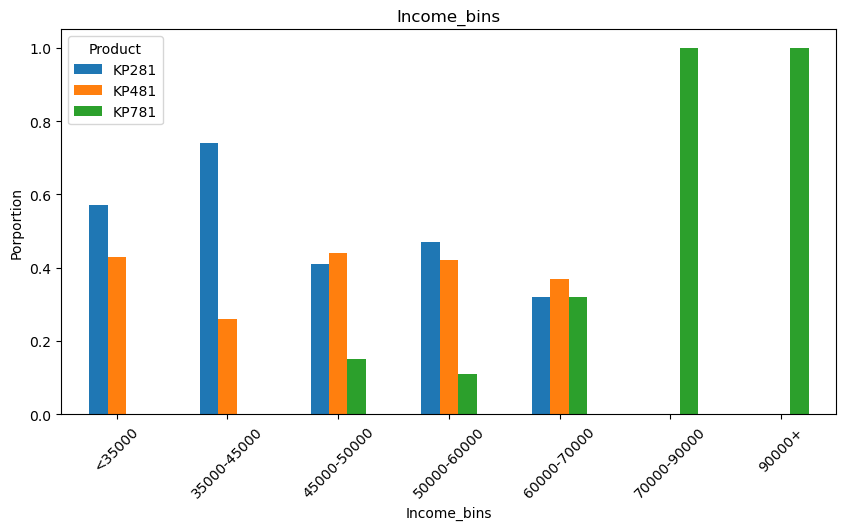

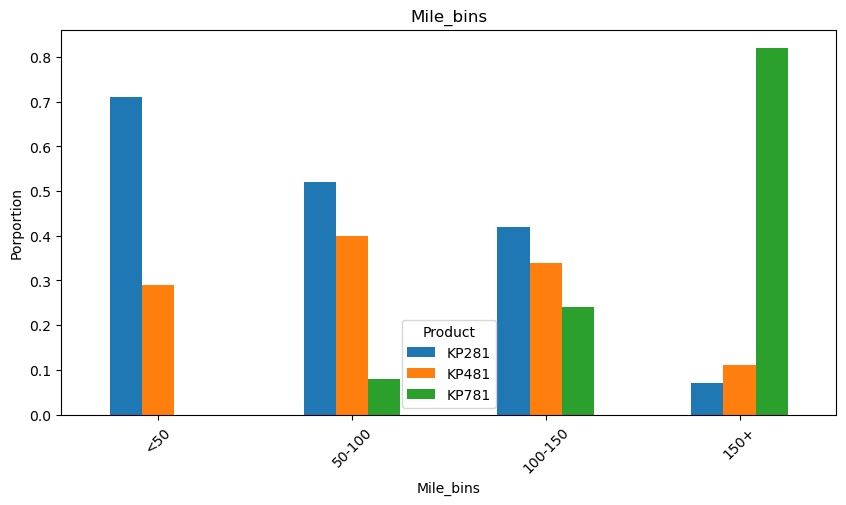

In [22]:
cat_cols=['Gender','Education', 'MaritalStatus', 'Usage','Fitness','Age_bins','Income_bins','Mile_bins']
for i in cat_cols:
    va = pd.crosstab(df[i],df['Product'])
    new = round(va.div(va.sum(axis=1),0),2)
    ax=new.plot(kind='bar',title=i,figsize=(10,5))
    ax.set_xlabel(i)
    ax.set_ylabel('Porportion')
    plt.xticks(rotation=45)
    plt.show()

**Observations on the basis of above Categorical Plots**

1) Around 55% of women prefer KP281 and only 10% prefer KP781. While around 35% of men prefer KP781.

2) 80% in Eduation level of 18 and everyone in Education levels of 20 or 21 use KP781 while below 14 level, no one uses KP781.

3) Marital Status implies no significant information on the usages of different treadmills.

4) Those who workout 6 or 7 days a week use KP781 while 60% of those who workout 5 days a week use KP781.

5) 95% of customers having fitness level of 5 use KP781 and none of those having fitness level below 3 use KP781.

6) No one below 20 years of age use KP781.

7) Above 70000 units of Income, people only use KP781 while in Incomes below 45000, no one uses KP781.

8) Almost 80% of people who run over 200 miles and those who run above 150 miles use KP781 and no one who runs below 50 miles use KP781. The usage of KP281 decreases with the increase in miles while that of KP781 increases with the increase in miles.

# Marginal Probability

In [23]:
df1=df[["Product","Gender","MaritalStatus"]].melt()
round((df1.groupby(['variable','value'])['value'].count()/len(df))*100,2)

variable       value    
Gender         Female       42.22
               Male         57.78
MaritalStatus  Partnered    59.44
               Single       40.56
Product        KP281        44.44
               KP481        33.33
               KP781        22.22
Name: value, dtype: float64

# Conditional Probability

In [24]:
from IPython.display import display
cat_cols=['Gender','Education', 'MaritalStatus', 'Usage','Fitness','Age_bins','Income_bins','Mile_bins']
for i in cat_cols:
    print('Table for',str(i),'vs Treadmill Product')
    display(pd.crosstab(df[i],df['Product'],margins=True,normalize='index'))
    

Table for Gender vs Treadmill Product


Product,KP281,KP481,KP781
Gender,,,
Female,0.526316,0.381579,0.092105
Male,0.384615,0.298077,0.317308
All,0.444444,0.333333,0.222222


Table for Education vs Treadmill Product


Product,KP281,KP481,KP781
Education,,,
12,0.666667,0.333333,0.000000
13,0.600000,0.400000,0.000000
14,0.545455,0.418182,0.036364
15,0.800000,0.200000,0.000000
16,0.458824,0.364706,0.176471
18,0.086957,0.086957,0.826087
20,0.000000,0.000000,1.000000
21,0.000000,0.000000,1.000000
All,0.444444,0.333333,0.222222


Table for MaritalStatus vs Treadmill Product


Product,KP281,KP481,KP781
MaritalStatus,,,
Partnered,0.448598,0.336449,0.214953
Single,0.438356,0.328767,0.232877
All,0.444444,0.333333,0.222222


Table for Usage vs Treadmill Product


Product,KP281,KP481,KP781
Usage,,,
2,0.575758,0.424242,0.000000
3,0.536232,0.449275,0.014493
4,0.423077,0.230769,0.346154
5,0.117647,0.176471,0.705882
6,0.000000,0.000000,1.000000
7,0.000000,0.000000,1.000000
All,0.444444,0.333333,0.222222


Table for Fitness vs Treadmill Product


Product,KP281,KP481,KP781
Fitness,,,
1,0.500000,0.500000,0.000000
2,0.538462,0.461538,0.000000
3,0.556701,0.402062,0.041237
4,0.375000,0.333333,0.291667
5,0.064516,0.000000,0.935484
All,0.444444,0.333333,0.222222


Table for Age_bins vs Treadmill Product


Product,KP281,KP481,KP781
Age_bins,,,
<20,0.600000,0.400000,0.000000
20-25,0.405797,0.347826,0.246377
25-30,0.512195,0.170732,0.317073
30-35,0.343750,0.531250,0.125000
35-40,0.500000,0.375000,0.125000
40+,0.500000,0.166667,0.333333
All,0.444444,0.333333,0.222222


Table for Income_bins vs Treadmill Product


Product,KP281,KP481,KP781
Income_bins,,,
<35000,0.571429,0.428571,0.000000
35000-45000,0.742857,0.257143,0.000000
45000-50000,0.411765,0.441176,0.147059
50000-60000,0.472727,0.418182,0.109091
60000-70000,0.315789,0.368421,0.315789
70000-90000,0.000000,0.000000,1.000000
90000+,0.000000,0.000000,1.000000
All,0.444444,0.333333,0.222222


Table for Mile_bins vs Treadmill Product


Product,KP281,KP481,KP781
Mile_bins,,,
<50,0.705882,0.294118,0.000000
50-100,0.515464,0.402062,0.082474
100-150,0.421053,0.342105,0.236842
150+,0.071429,0.107143,0.821429
All,0.444444,0.333333,0.222222


**Brief depiction of Probabilities Inferred from the above tables**

1) In all the tables, one can see the last row named All, it consists of the overall probabilities of purchases of those 3 treadmills, i.e. - Probability of purchase of KP281= 44%, KP481= 33% and KP781=22%

2) P(KP281|Education=12) = 66.66% and P(KP781|Education=18) = 82.6%
   P(KP781|Education=20) = P(KP781|Education=21) = 100%

3) P(KP281|Usage=2) = 57.57%, P(KP781|Usage=6)=P(KP781|Usage=7) = 100%

4) P(KP481|Fitness=2) = 46.15%

5) P(KP481|Age_bins=30-35) = 53.12% 

6) P(KP781|Income>70000) = 100% and P(KP481|Income_bins=45000-50000) = 44.11%

7) P(KP281|Mile_bins<50) = 70.5% and  P(KP781|Mile_bins>150)=82.1%

<Axes: xlabel='Product', ylabel='MaritalStatus'>

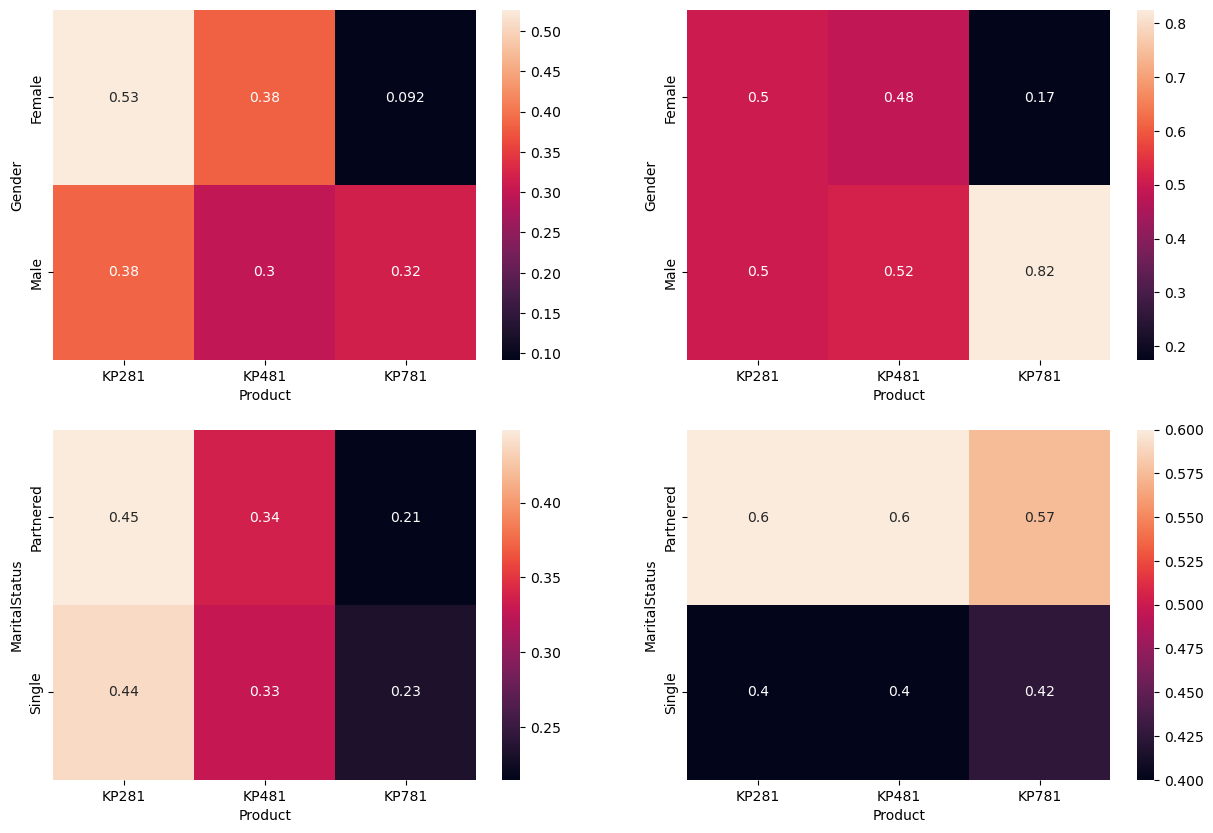

In [25]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.heatmap(pd.crosstab(df["Gender"],df["Product"],normalize="index"),annot=True)
plt.subplot(2,2,2)
sns.heatmap(pd.crosstab(df["Gender"],df["Product"],normalize="columns"),annot=True)
plt.subplot(2,2,3)
sns.heatmap(pd.crosstab(df["MaritalStatus"],df["Product"],normalize="index"),annot=True)
plt.subplot(2,2,4)
sns.heatmap(pd.crosstab(df["MaritalStatus"],df["Product"],normalize="columns"),annot=True)

## Observations:
1. conditional probability for each product given that in Gender
* p(KP281|Male)=0.38
* p(KP281|Female)=0.53
* p(KP481|Male)=0.3
* p(KP481|Female)=0.38
* p(KP781|Male)=0.32
* p(KP781|Female)=0.092
2. conditional probability for Gender given that in Product
* p(Male|KP281)=0.5
* p(Male|KP481)=0.52
* p(Male|KP781)=0.82
* P(Female|KP281)=0.5
* p(Female|KP481)=0.48
* p(Female|KP781)=0.17
3. conditional probability for MaritalStatus given that in Product
* p(Single|KP281)=0.4
* p(Single|KP481)=0.4
* p(Single|KP781)=0.42
* P(Partnered|KP281)=0.6
* p(Partnered|KP481)=0.6
* p(Partnered|KP781)=0.57
4. conditional probability for Product given that in MaritalStatus
* p(KP281|Single)=0.44
* p(KP281|Partnered)=0.45
* p(KP481|Single)=0.33
* p(KP481|Partnered)=0.34
* p(KP781|Single)=0.23
* p(KP781|Partnered)=0.21


**Till now we've got great insights for the customers peratining to KP781 while clarity regarding KP281 and KP481 seems to be missing**

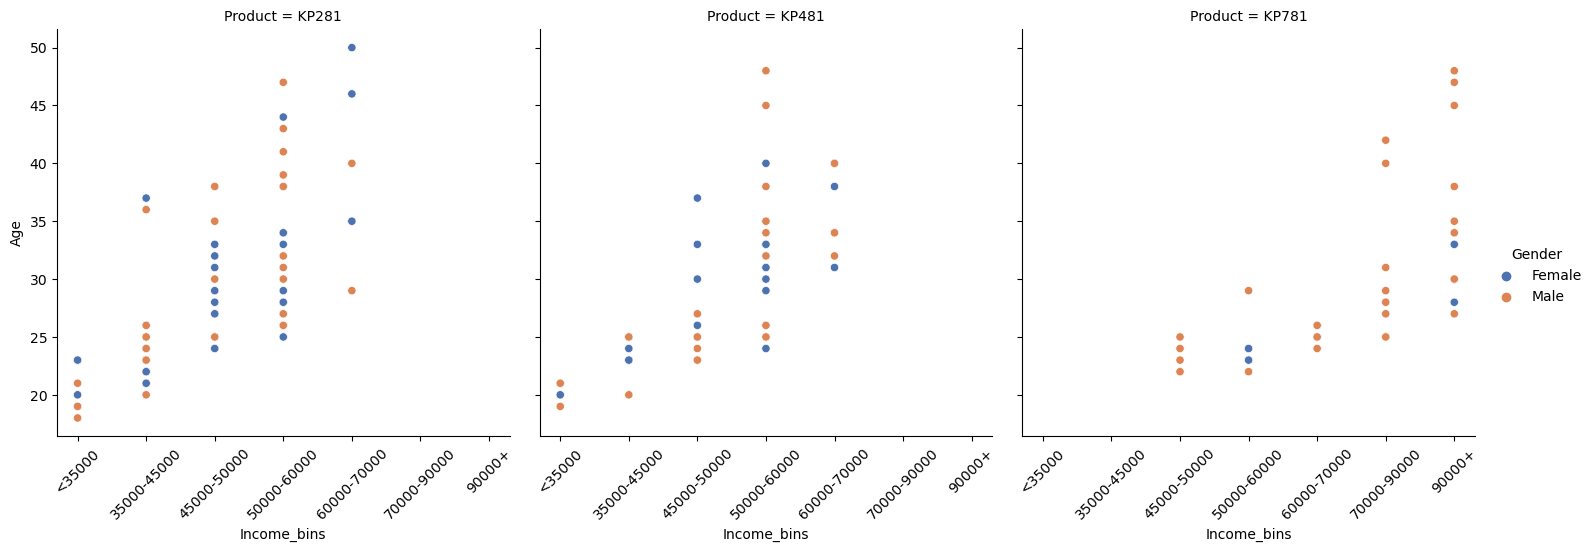

<Figure size 1000x800 with 0 Axes>

In [26]:
# Analyzing the relationship between income and age across different products, considering gender as a factor.

plot=sns.relplot(data=df, x='Income_bins', y='Age', col='Product', hue='Gender', palette="deep", kind="scatter")
plt.figure(figsize=(10,8))
for axes in plot.axes.flat:
    axes.set_xticklabels(axes.get_xticklabels(), rotation=45)
    plt.tight_layout()

* For women having incomes below 60k, the average age of those who use KP281 is 40 while it's 35 for those who use KP481. Only 2 women have incomes over 70k which is certainly the reason for a large proportion of them not buying KP781 (affordability).
* Moreover the variances are higher in case of KP281. Though there are less data points for this observation, so it requires more data to be verified

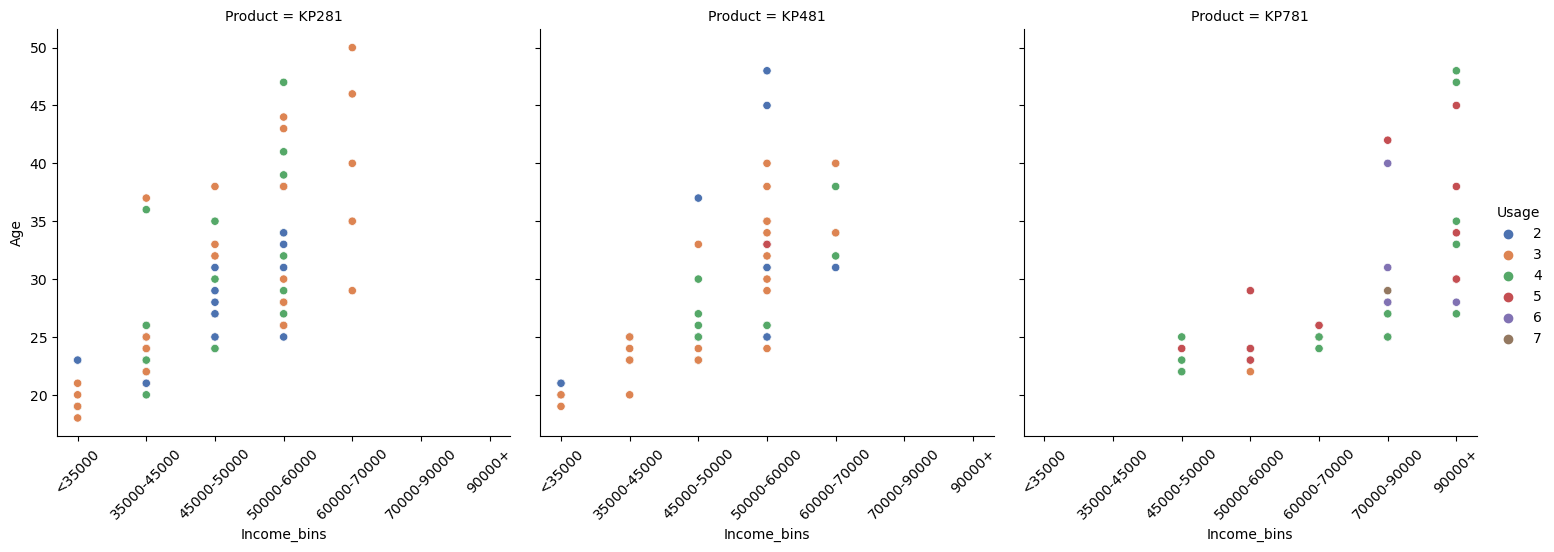

<Figure size 1000x800 with 0 Axes>

In [27]:
# Analyzing the relationship between income and age across different products, considering usage as a factor.

plot=sns.relplot(data=df, x='Income_bins', y='Age', col='Product', hue='Usage', palette="deep", kind="scatter")
plt.figure(figsize=(10,8))
for axes in plot.axes.flat:
    axes.set_xticklabels(axes.get_xticklabels(), rotation=45)
    plt.tight_layout()

* For Usage=3 and Income in the range 60k-70k, we are very much certain of the user to be buying the KP281 Treadmill.
* For Usage=2 and Income in the range 45k-50k, we are very much certain of the user to be buying the KP281 Treadmill.
* For income range 45k-50k and Usage=4, we are very much certain of the user to be buying KP281 Treadmill.
* For income range 50k-60k and Usage=4, we are very much certain of the user to be buying KP281 Treadmill.


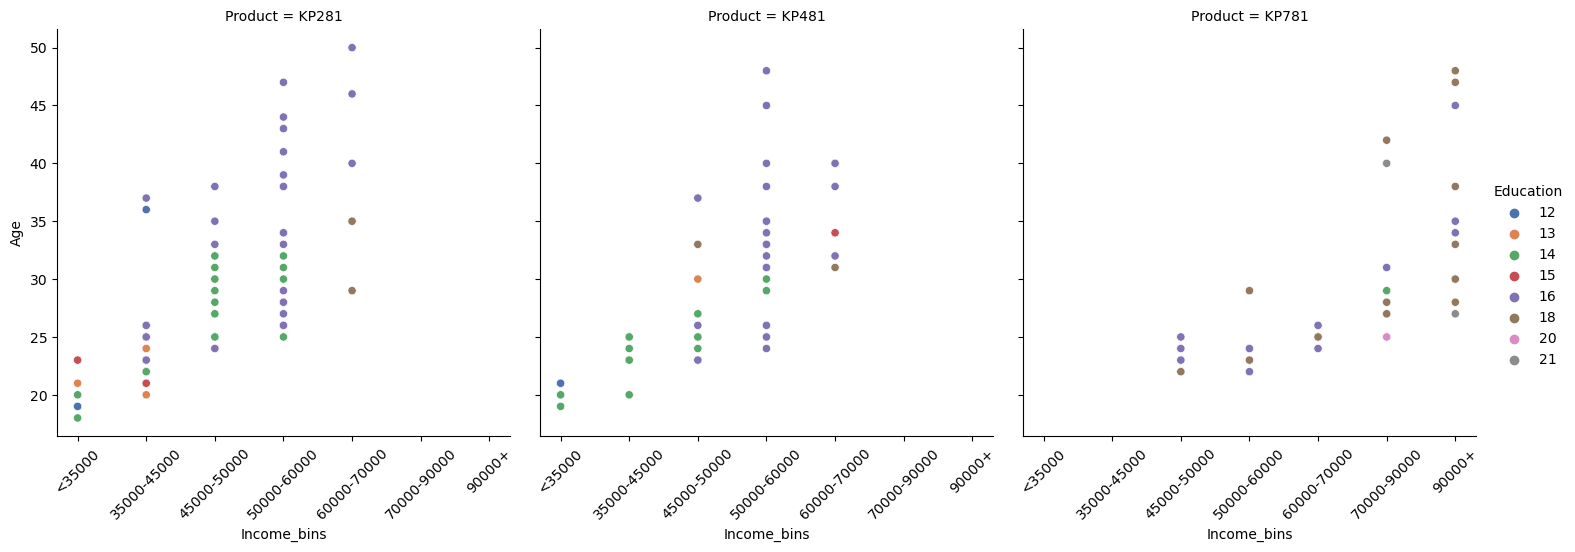

<Figure size 1000x800 with 0 Axes>

In [28]:
# Analyzing the relationship between income and age across different products, considering Education as a factor.

plot=sns.relplot(data=df, x='Income_bins', y='Age', col='Product', hue='Education', palette="deep", kind="scatter")
plt.figure(figsize=(10,8))
for axes in plot.axes.flat:
    axes.set_xticklabels(axes.get_xticklabels(), rotation=45)
    plt.tight_layout()

* For Education level of 16, above 32 years of age with Income between 45k-50k will tend to use KP281 and below 22 will tend to use KP481.
* Also for the same Education level customers but in Income range 60k-70k, above 45 years of age will tend to use KP281 while customers below 35 years of age will tend to use KP481.

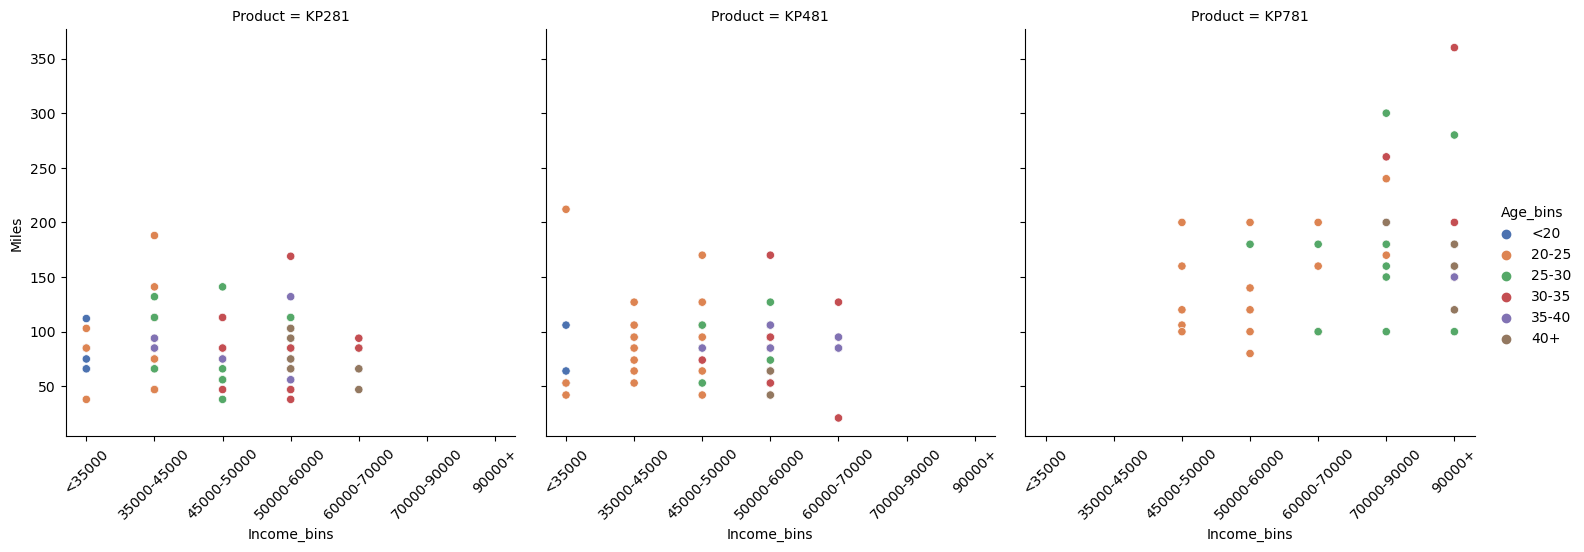

<Figure size 1000x800 with 0 Axes>

In [29]:
# Analyzing the relationship between income and age across different products, considering Age_bins as a factor.

plot=sns.relplot(data=df, x='Income_bins', y='Miles', col='Product', hue='Age_bins', palette="deep", kind="scatter")
plt.figure(figsize=(10,8))
for axes in plot.axes.flat:
    axes.set_xticklabels(axes.get_xticklabels(), rotation=45)
    plt.tight_layout()

* All 25-30 and 35-40 years old individuals having incomes in the range of 35k-45k tend to buy KP281.
* Individuals having 40+ years of age and income ranges in 60k-70k are more likely to use KP281 while the individuals of same income range but 35-40 years of age tend to use KP481.

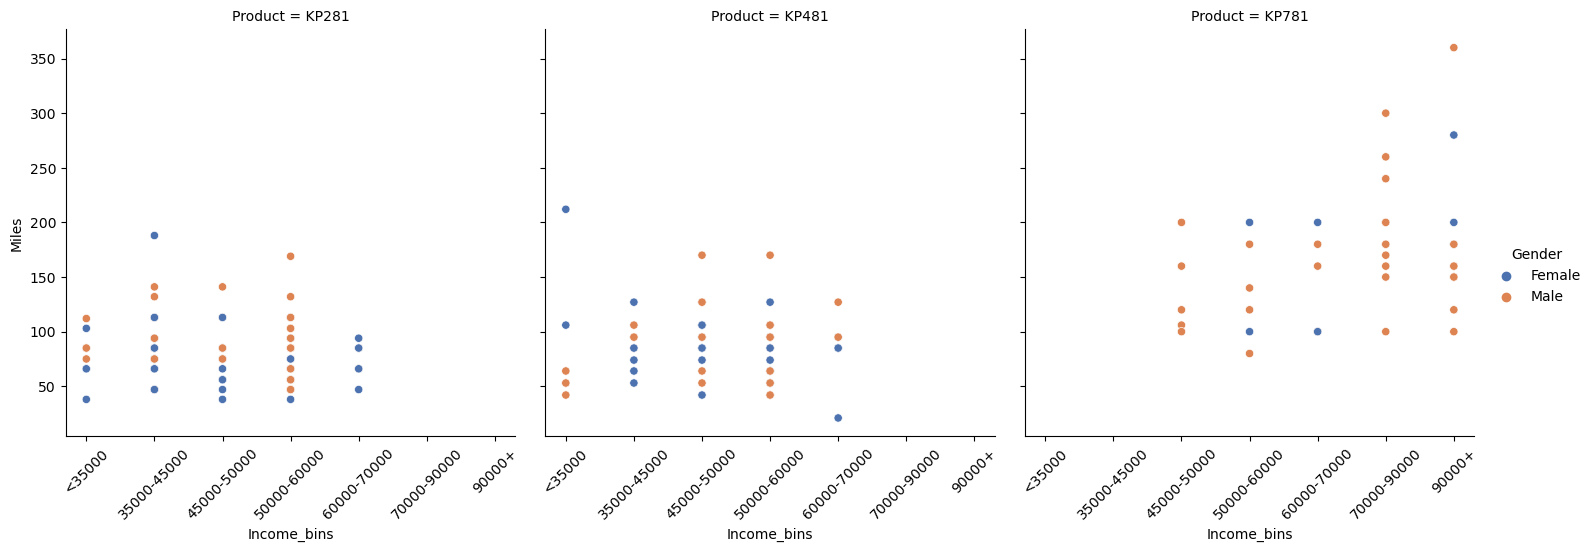

<Figure size 1000x800 with 0 Axes>

In [30]:
# Analyzing the relationship between income and Miles across different products, considering gender as a factor.

plot=sns.relplot(data=df, x='Income_bins', y='Miles', col='Product', hue='Gender', palette="deep", kind="scatter")
plt.figure(figsize=(10,8))
for axes in plot.axes.flat:
    axes.set_xticklabels(axes.get_xticklabels(), rotation=45)
    plt.tight_layout()

* For income level below 35k, women who tread over 105 miles tend to use KP481 while those who tread below 105 tend to use KP281.
* Men with income level in 60k-70k, those who run in the range of 100-150 miles tend to use KP481.


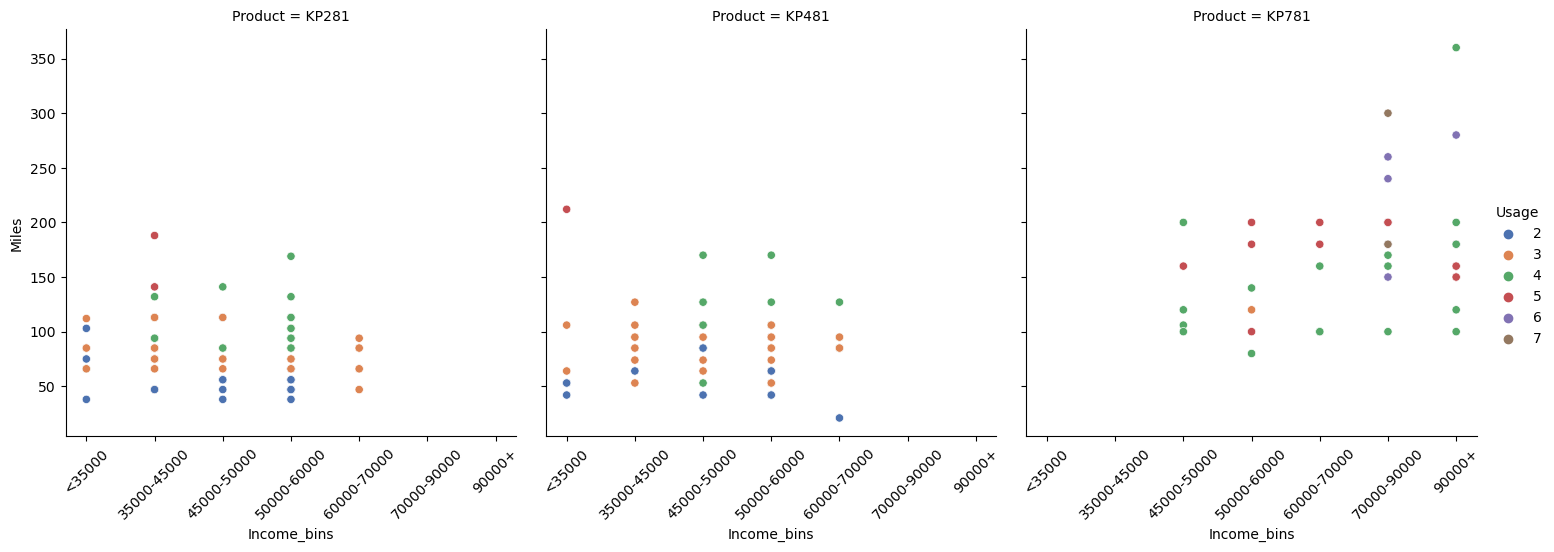

<Figure size 1000x600 with 0 Axes>

In [31]:
# Analyzing the relationship between income and Miles across different products, considering Usage as a factor.

plot=sns.relplot(data=df, x='Income_bins', y='Miles', col='Product', hue='Usage', palette="deep", kind="scatter")
plt.figure(figsize=(10,6))
for axes in plot.axes.flat:
    _ = axes.set_xticklabels(axes.get_xticklabels(), rotation=45)
plt.tight_layout()


* For usage 3 and 2 Income less then 40k is more chance of buying the product KP281
* For usage 3 Income between 40k and 60k is more chance of buying the product KP481

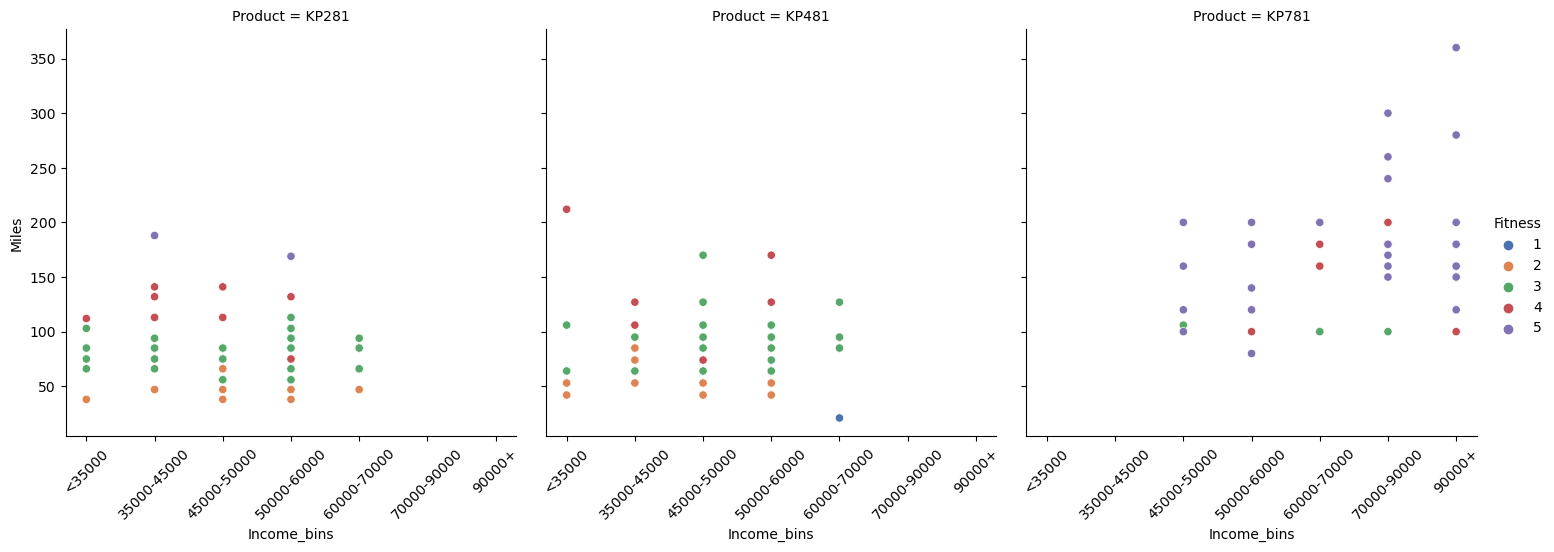

<Figure size 1000x600 with 0 Axes>

In [32]:
# Analyzing the relationship between income and Miles across different products, considering Fitness as a factor.

plot=sns.relplot(data=df, x='Income_bins', y='Miles', col='Product', hue='Fitness', palette="deep", kind="scatter")
plt.figure(figsize=(10,6))
for axes in plot.axes.flat:
    _ = axes.set_xticklabels(axes.get_xticklabels(), rotation=45)
plt.tight_layout()


* For Fitness level 4 and 3 and incomes less then 60k, There is more chances of buying the product KP then these customers will  and KP481. 


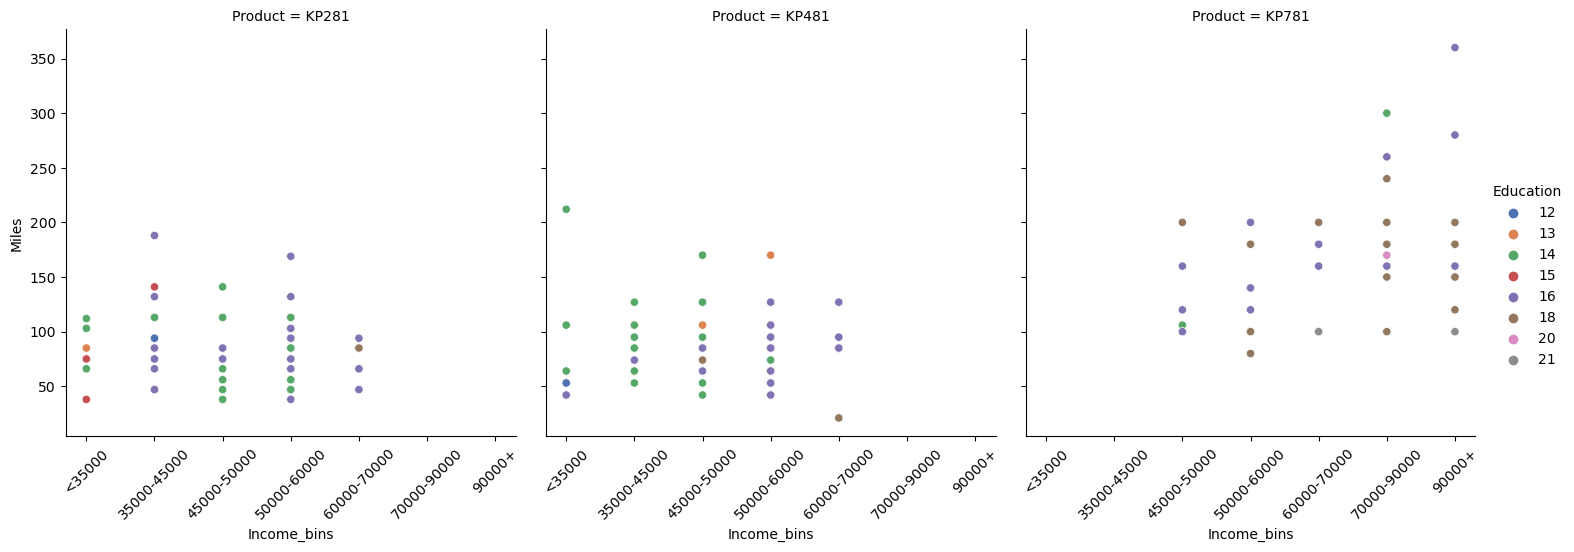

<Figure size 1000x600 with 0 Axes>

In [33]:
# Analyzing the relationship between income and Miles across different products, considering Education as a factor.

plot=sns.relplot(data=df, x='Income_bins', y='Miles', col='Product', hue='Education', palette="deep", kind="scatter")
plt.figure(figsize=(10,6))
for axes in plot.axes.flat:
    _ = axes.set_xticklabels(axes.get_xticklabels(), rotation=45)
plt.tight_layout()


* Customers with Education level of 13 and in Income range of 45k-60k will tend to use KP481 while those with Education level of 15 and below 35k income will tend to use KP281

# Recommendations and Customer Profiling

**Customer Profiles for KP781**
<br>

1) Only people having incomes greater than 70k have run over 220 miles and all of then use KP781.

2) Recommend KP781 if one or more conditions are satisfied along with a necessary condition of Income > 70000:-
<br>
    a) Education Level >= 18
    b) Usage days > = 5 
    c) Fitness Levels = 5 
    d) The person runs more than 150 miles(80% of them use KP781)

3) Never Recommend KP781 if one or more of these conditions are satisfied:-
<br>
    a) Education Levels < 14
    b) Fitness < 3
    c) Age < 20
    d)Income < 45000
    e) Miles run < 50 

**Why very few women have bought the luxurious KP781 treadmill?**
<br>
Only 2 women have incomes over 70k which is certainly the reason for a large proportion of them not buying KP781(affordability).


**Note for below mentioned points**
KP281 and KP481 don't have much differences in their costs and the characteristics of customers who use them . Still a few of them have been identified but they need to be validated with an incremental data.

**Customer Profiles for KP281:**

1) Women having incomes below 70k and age > 40 
<br>
2) Customers having income in range 60k-70k and usage days=3 
<br>
3) Customers having income in range 45k-50k and usage days=2
<br> 
4) Customers having income in range 35k-45k and usage days=4 
<br>
5) Customers having income in range 50k-60k and usage days=4
<br>
6) Customers with Fitness=4, age closer to 40 and income 50k-60k
<br>
7) Customers with Education Level=16, Age>32 and income 45k-50k
<br>
8) Customers with Education Level=16, Age>45 and income 60k-70k
<br>
9) Customers with Age in 25-30 and 35-40 having incomes in range 35k-45k 
<br>
10) Customers with 40+ Age and 60k-70k income
<br>
11) Women with incomes < 35k and whose miles run < 105 
<br>
12) Customers with usages=5, incomes in range 35k-45k and who run more than 140 miles
<br>
13) Customers with Fitness=5, incomes < 70k and Incomes in 45k-50k
<br>
14) Customers with Education level=15 having incomes less than 35k
<br>
15) Customers with Usages=3, miles run < 70 and Age>40
<br>
16) Customers with Usages=2 and Age between 25-30


**Customer Profiles for KP481:**

1) Women having incomes below 70k and age between 32-37 
<br>
2) Customers with age < 25, incomes in range 50-60k and the miles run is in the range 100-150
<br>
3) Customers with Fitness=4, age in range 25-32 and income 50k-60k
<br>
4) Customers with Education Level=16, Age< 22 and income 45k-50k
<br>
5) Customers with Education Level=16, Age< 35 and income 60k-70k
<br>
6) Customers with 35-40 Age and 60k-70k income
<br>
7) Women with incomes < 35k and whose miles run >105
<br>
8) Men with incomes 60k-70k and who tread in range 100-150 miles 
<br>
9) Customers with Fitness=4, incomes < 45k-50k and who run more than 100 miles
<br>
10) Customers with Education level=13 having incomes in ranges 45-60k
<br>
11) Customers with Usages=2 and Age>40